<a href="https://colab.research.google.com/github/archita924/CSA522_ML/blob/master/SIMPLE_NEURAL_NETWORK_USING_MNIST_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SET UP**

In [40]:
import pandas as pd #For data analysis, handling CSV/Excel files
import numpy as np #For mathematical functions
import matplotlib.pyplot as plt

In [41]:
# Step 1: Import libraries
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical


**LOAD MNIST DATASET**

Keras automatically downloads and loads the MNIST dataset for you!
 It gives you: • x_train: training images
 • y_train: correct digit labels for training
 • x_test and y_test: for testing the model later

In [42]:
# Step 2: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [43]:
x_train.shape

(60000, 28, 28)

In [44]:
y_train.shape

(60000,)

In [45]:
single_image=x_train[0]

In [46]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [47]:
single_image.max()

np.uint8(255)

**WHAT IS PRESENT IN IMAGE**

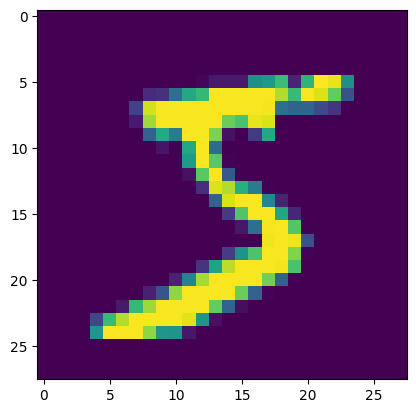

In [48]:
plt.imshow(single_image)

**Preprocess the data**

Why do we divide by 255?"

 Explain: Each pixel’s intensity ranges from 0 to 255. Dividing by 255 converts it to 0–1, making it easier for the neural network to learn. (It trains faster and avoids large number errors.)

"Think of it like normalizing marks from 0–100 to 0–1 — easier to compare!"

In [49]:

x_train = x_train.astype('float32') / 255.0   # Normalize pixel values (0–255 → 0–1)
x_test = x_test.astype('float32') / 255.0

FLATTEN THE IMAGE

In [50]:
x_train = x_train.reshape((x_train.shape[0], 28*28))
x_test = x_test.reshape((x_test.shape[0], 28*28))

Converting Labels to One-Hot Encoding

Neural networks work better when each class is represented as a vector, not just a number. Example: Digit 3 → [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] Digit 7 → [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

This is called One-Hot Encoding 🔥

In [51]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Step 1:

model = keras.Sequential([...])

That’s exactly what Sequential means!

Each layer is stacked in order, and the output of one becomes the input of the next.

Step 2: Dense(128, activation='relu')

Dense → means every neuron is connected to all neurons in the previous layer.

128 → means we have 128 neurons (little decision-makers).

activation='relu' → makes learning faster and smarter by turning off negative signals.

Step 3: Dense(10, activation='softmax')

10 → because we have 10 possible digits (0–9).

softmax → turns the outputs into probabilities that add up to 1.


Example: [0.01, 0.05, 0.10, 0.70, 0.05, 0.02, 0.03, 0.02, 0.01, 0.01]

→ The model says: “I’m 70% sure this is a 3.”

**Build the model**

In [59]:
model = Sequential([
    Flatten(input_shape=(28, 28)),         # Converts 28x28 image into 1D array
    Dense(128, activation='relu'),         # Hidden layer
    Dense(10, activation='softmax')        # Output layer
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [60]:
model=Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [53]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

**TRAIN THE MODEL**

Compile() : how to think, how to measure mistakes, and what to focus on.

optimizer : teaches the model how to improve,

loss : tells it how wrong it is,

metrics :tell us how well it’s doing!


In [54]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

“What do you think happens when we call fit()?”

 This is where the real training happens.

• The model takes input images, predicts outputs, compares them with the correct labels (y_train), and updates itself to reduce the loss — over and over again.

• validation_split=0.1 means: 10% of training data is kept aside for validation (to check how well the model generalizes while learning).

In [55]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8168 - loss: 0.6586 - val_accuracy: 0.9577 - val_loss: 0.1663
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9455 - loss: 0.1923 - val_accuracy: 0.9650 - val_loss: 0.1253
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9631 - loss: 0.1310 - val_accuracy: 0.9700 - val_loss: 0.1070
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9702 - loss: 0.1014 - val_accuracy: 0.9730 - val_loss: 0.0921
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9773 - loss: 0.0802 - val_accuracy: 0.9765 - val_loss: 0.0843
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9808 - loss: 0.0646 - val_accuracy: 0.9790 - val_loss: 0.0770
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9860 - loss: 0.0507 - val_accuracy: 0.9763 - val_loss: 0.0808
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9874 - loss: 0.0447 - val_accuracy: 0.

**Evaluate the trained model**

“So, we trained the model on training data — but how do we know if it really understands digits and isn’t just memorizing them?”

🧠 Explain: That’s exactly what model.evaluate() does. It checks how well the model performs on test data — data it has never seen before.

In [56]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)
print(" Test Loss:", test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9741 - loss: 0.0899
Test Accuracy: 0.9776999950408936
 Test Loss: 0.07909739762544632
